In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [3]:
df = pd.read_csv("heart_disease.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8


## Missing Data
- inspecting missing data

<AxesSubplot:>

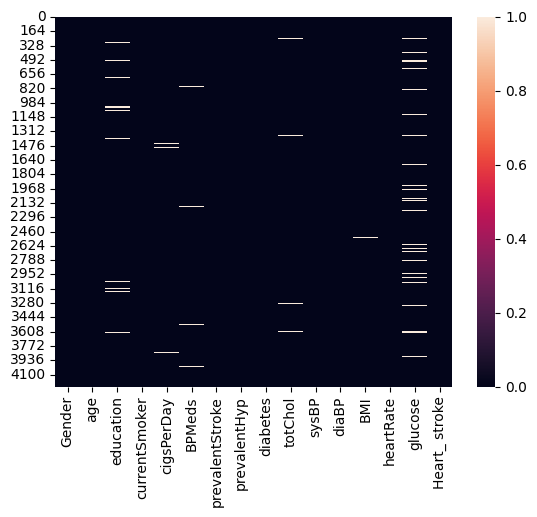

In [6]:
sns.heatmap(df.isnull())

## Using average age to replace 
- will use average of the data set related to the education level

In [7]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


<AxesSubplot:xlabel='education', ylabel='age'>

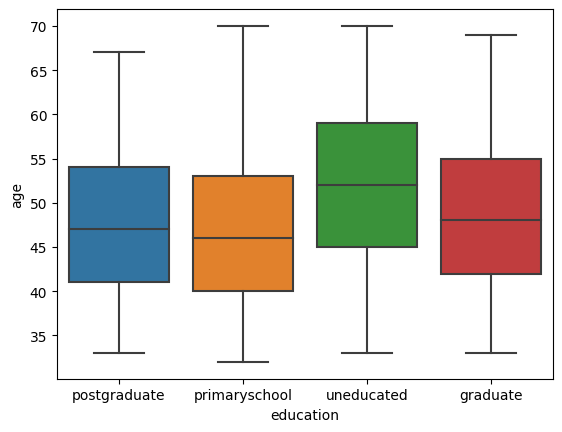

In [8]:
sns.boxplot(x = "education", y = "age", data = df)

In [9]:
df["education"].unique()

array(['postgraduate', 'primaryschool', 'uneducated', 'graduate', nan],
      dtype=object)

In [10]:
def replaceMissingEducation(columns):
    Age = columns[0]
    Ed = columns[1]
    
    if pd.isnull(Ed):
        if Age <= 46:
            return "postgraduate"
        elif Age <= 45:
            return "primaryschool"
        elif Age >= 50:
            return "uneducated"
        else:
            return "graduate"
    else:
        return Ed
    

In [11]:
df["education"] = df[["age", "education"]].apply(replaceMissingEducation, axis=1)

<AxesSubplot:>

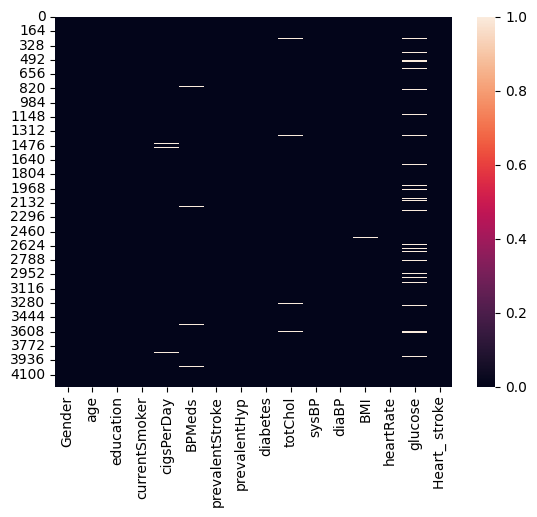

In [12]:
sns.heatmap(df.isnull())

In [13]:
##Glucose

In [14]:
df["glucose"] = df["glucose"].replace(0, np.mean(df["glucose"].values))

<AxesSubplot:>

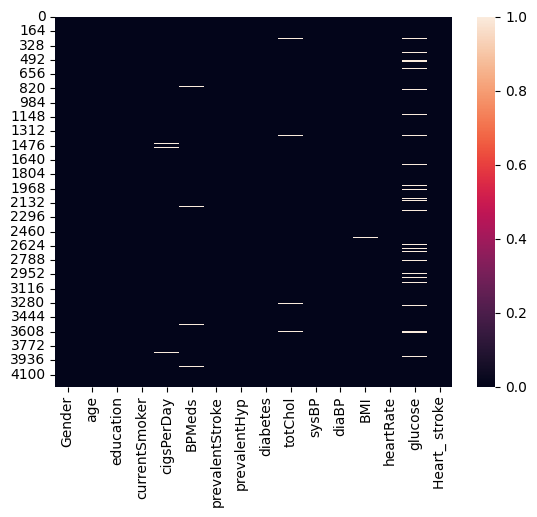

In [15]:
sns.heatmap(df.isnull())

## Dropping Data 
- Some columns minimal data missing so we will simply drop those

In [16]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'],
      dtype='object')

In [17]:
df = df.dropna(axis=0)

<AxesSubplot:>

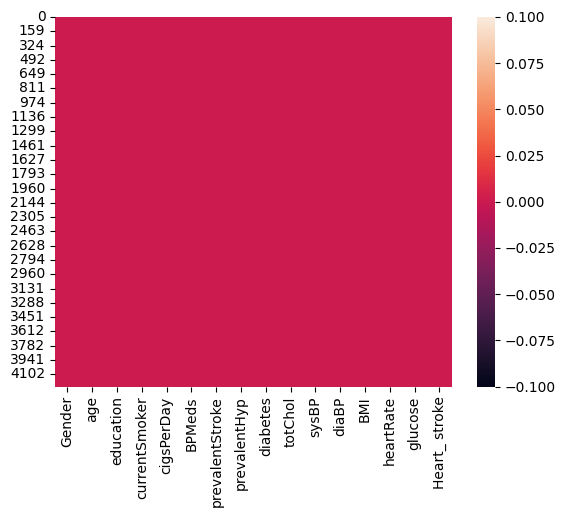

In [18]:
sns.heatmap(df.isnull())

In [19]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

/Users/berkatbhatti/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
edd = pd.get_dummies(df["education"], drop_first=True)

In [21]:
df= pd.concat([df, edd], axis=1)

In [22]:
df.drop("education", axis=1, inplace=True)

In [23]:
df["prevalentStroke"] = pd.get_dummies(df["prevalentStroke"], drop_first=True)

In [24]:
df["Heart_ stroke"] = pd.get_dummies(df["Heart_ stroke"], drop_first=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3749 non-null   uint8  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   uint8  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  Heart_ stroke    3749 non-null   uint8  
 15  postgraduate     3749 non-null   uint8  
 16  primaryschool    3749 non-null   uint8  
 17  uneducated    

## Data prapration
- Data is unbalanced 
- this could cause an issue in model classification

<AxesSubplot:xlabel='Heart_ stroke', ylabel='count'>

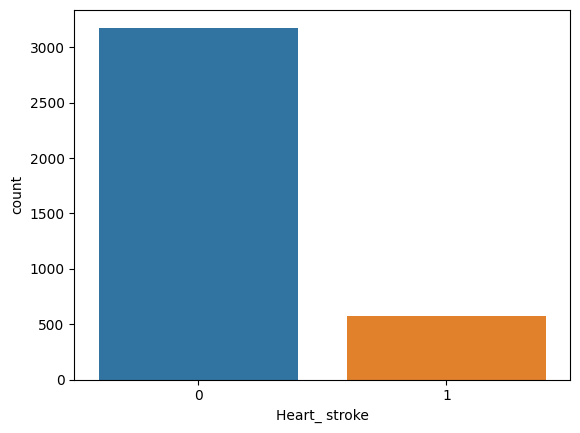

In [26]:
sns.countplot(x = df["Heart_ stroke"])

In [27]:
targetColumn = "Heart_ stroke"

In [28]:
X = df.drop(targetColumn, axis=1).values
y = df["Heart_ stroke"].values

In [30]:
from skl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
model = Sequential()
model.add